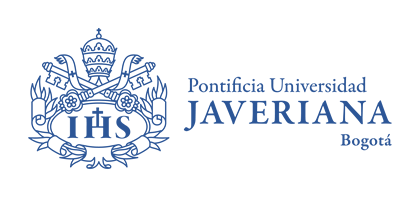

# Tecnologías emergentes - Taller SVM

## Integrantes
- Andrés García Montoya
- Nicolás David Rincón Ballesteros
- Alejandro Enrique Suárez Acosta

# Importando Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


/var/folders/fm/j8wz182j6b1869lk70fr1g5w0000gn/T/ipykernel_21279/2236480163.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Carga de datos

In [2]:
dataset = pd.read_csv('WinnipegDataset.txt')
dataset["label"].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [3]:
y_data = pd.DataFrame(dataset["label"].unique(), columns=["label"])
y_data

,label
0,1
1,2
2,3
3,4
4,5
5,6
6,7


# Análisis exploratorio de datos
Se realiza un análisis exploratorio de los datos para identificar la relación entre las variables y la variable objetivo, en este caso se elabora un mapa de calor para identificar la correlación entre las variables.

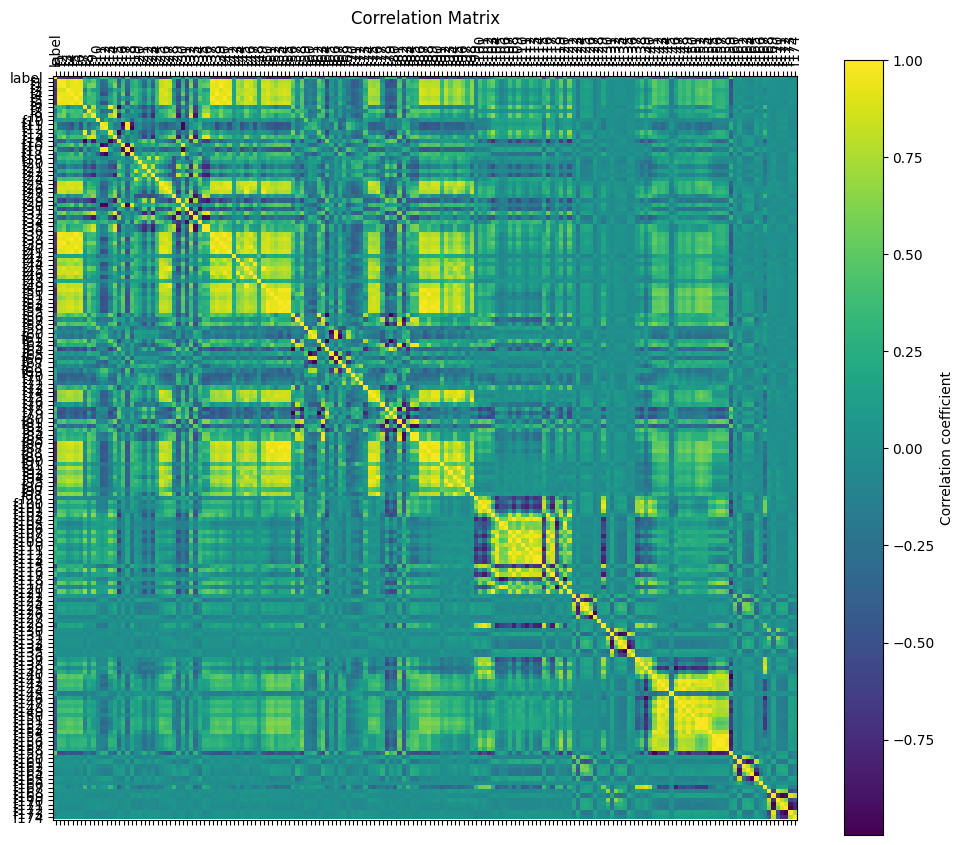

In [4]:
def plot_correlation_matrix(dataset):
    correlation_matrix = dataset.corr()
    plt.figure(figsize=(12, 10))
    plt.matshow(correlation_matrix, fignum=1)
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.colorbar(label='Correlation coefficient')
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(dataset)

# Preprocesamiento de datos
Se realiza un preprocesamiento de los datos, eliminando las variables altamente corrleacionadas (>95%) y haciendo un escalado de los datos.

### Eliminación de variables altamente correlacionadas

In [5]:
print(dataset["label"].unique())

# Se define el treshold de correlación
correlation_threshold = 0.95
# Se obtiene la matriz triangular superior de la matriz de correlación
# Ya que la matriz de correlación es simétrica, solo se toma la parte superior
correlation_matrix = np.abs(dataset.corr().values)
upper_triangle = np.triu(correlation_matrix, k=1)
# Se obtienen las posiciones de las variables a eliminar
to_drop = np.where(upper_triangle > correlation_threshold)
to_drop = set([dataset.columns[i] for i in to_drop[1]])
# Se eliminan las variables altamente correlacionadas
dataset.drop(to_drop, axis=1, inplace=True)
dataset.head()
print(dataset["label"].unique())

[1 2 3 4 5 6 7]
[1 2 3 4 5 6 7]


In [6]:
dataset["label"].unique()

array([1, 2, 3, 4, 5, 6, 7])

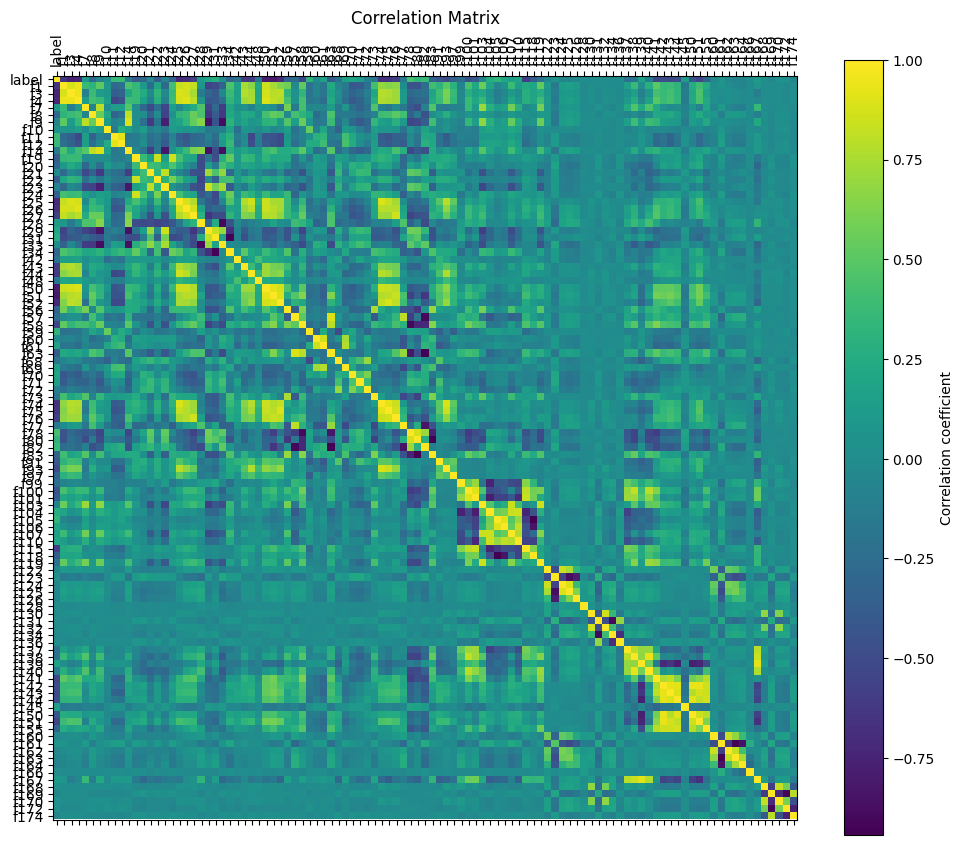

In [7]:
plot_correlation_matrix(dataset)

### Escalado de datos

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.drop('label', axis=1))
scaled_data = pd.DataFrame(scaled_data, columns=dataset.columns[1::])
scaled_data.head()

,f1,f3,f4,f7,f8,f9,f10,f11,f12,f14,...,f162,f163,f164,f166,f167,f168,f169,f170,f172,f174
0,0.452194,1.222832,0.901446,-1.433501,0.859635,-0.687087,0.350325,-0.516842,-0.367857,-0.273562,...,0.713910,1.135903,1.395822,0.898027,2.461464,32.414869,-5.896123,25.696272,2.652789,-0.028323
1,0.668218,1.530373,1.202123,-1.581594,1.120757,-0.654580,0.662312,-0.709760,-0.434976,-0.174124,...,0.190167,1.135903,0.258723,-1.847469,-0.046765,0.101992,-0.814262,0.425134,0.927648,-1.817572
2,0.774089,1.629827,1.345995,-1.553474,1.171669,-0.600352,1.033551,-0.888007,-0.464799,-0.115194,...,-0.071690,0.456821,0.542952,-0.172181,0.039718,0.507598,-2.177504,1.911679,1.811368,-1.194115
3,0.700464,1.643904,1.412813,-1.734502,1.696652,-0.436719,1.392446,-1.204425,-0.634058,0.182583,...,-0.071690,0.456821,1.503238,0.245278,1.510077,1.318810,-0.814262,0.425134,1.553319,-0.533756
4,0.701320,1.708013,1.478013,-1.857209,1.902376,-0.416147,1.673608,-1.283512,-0.602220,0.263599,...,0.347323,0.909556,1.218825,0.047318,1.423595,1.994775,-2.177504,1.911679,2.453055,-0.355574


## Separación de datos de entrenamiento y prueba

In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, dataset['label'], test_size=0.25, random_state=0)

In [10]:
y_train.unique()

array([3, 4, 6, 1, 5, 7, 2])

# Kernel rbf

### Entrenamiento

In [11]:
classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(X_train, y_train)

SVC(random_state=0)

### Predicción

In [12]:
y_pred_rbf = classifier_rbf.predict(X_test)

In [13]:
df = pd.DataFrame({'Predicted': y_pred_rbf, 'Actual': y_test})
df

,Predicted,Actual
100905,3,3
178208,4,4
7105,1,1
277408,6,6
9835,1,1
...,...,...
41129,2,2
4488,1,1
34437,1,1
131598,4,4


### Matriz de confusión

In [14]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
cm_rbf

array([[ 9833,     0,     1,     6,     4,     3,     8],
       [    0,   893,     0,     0,     0,     0,     6],
       [    1,     2, 18861,     3,     3,    10,     2],
       [    6,     1,     6, 18692,    11,     9,     0],
       [    5,     0,     5,    15, 11568,    74,     1],
       [    0,     0,     6,    12,    46, 21076,     4],
       [    1,     0,     0,     0,     1,     2,   282]])

### Evaluación del modelo

In [15]:
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_rbf

0.9968818669514725

In [16]:
classification_report_rbf = classification_report(y_test, y_pred_rbf)
print(classification_report_rbf)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9855
           2       1.00      0.99      0.99       899
           3       1.00      1.00      1.00     18882
           4       1.00      1.00      1.00     18725
           5       0.99      0.99      0.99     11668
           6       1.00      1.00      1.00     21144
           7       0.93      0.99      0.96       286

    accuracy                           1.00     81459
   macro avg       0.99      0.99      0.99     81459
weighted avg       1.00      1.00      1.00     81459



# Kernel polinómico de grado 2

### Entrenamiento

In [17]:
classifier_poly2 = SVC(kernel='poly', degree=2)
classifier_poly2.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

### Predicción

In [18]:
y_pred_poly2 = classifier_poly2.predict(X_test)

In [19]:
df = pd.DataFrame({'Predicted': y_pred_poly2, 'Actual': y_test})
df

,Predicted,Actual
100905,3,3
178208,4,4
7105,1,1
277408,6,6
9835,1,1
...,...,...
41129,2,2
4488,1,1
34437,1,1
131598,4,4


### Matriz de confusión

In [20]:
cm_poly2 = confusion_matrix(y_test, y_pred_poly2)
cm_poly2

array([[ 9828,     0,     4,    13,     2,     5,     3],
       [    1,   898,     0,     0,     0,     0,     0],
       [    2,     1, 18856,     4,     6,    13,     0],
       [   16,     0,     3, 18682,    17,     7,     0],
       [    5,     0,    10,    10, 11544,    99,     0],
       [    8,     0,     6,    21,    70, 21037,     2],
       [    3,     0,     0,     1,     2,     3,   277]])

### Evaluación del modelo

In [21]:
accuracy_poly2 = accuracy_score(y_test, y_pred_poly2)
accuracy_poly2

0.9958629494592371

In [22]:
classification_report_poly2 = classification_report(y_test, y_pred_poly2)
print(classification_report_poly2)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9855
           2       1.00      1.00      1.00       899
           3       1.00      1.00      1.00     18882
           4       1.00      1.00      1.00     18725
           5       0.99      0.99      0.99     11668
           6       0.99      0.99      0.99     21144
           7       0.98      0.97      0.98       286

    accuracy                           1.00     81459
   macro avg       0.99      0.99      0.99     81459
weighted avg       1.00      1.00      1.00     81459



# Kernel polinómico de grado 3

### Entrenamiento

In [23]:
classifier_poly3 = SVC(kernel='poly', degree=2)
classifier_poly3.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

### Predicción

In [24]:
y_pred_poly3 = classifier_poly3.predict(X_test)

In [25]:
df = pd.DataFrame({'Predicted': y_pred_poly3, 'Actual': y_test})
df

,Predicted,Actual
100905,3,3
178208,4,4
7105,1,1
277408,6,6
9835,1,1
...,...,...
41129,2,2
4488,1,1
34437,1,1
131598,4,4


### Matriz de confusión

In [26]:
cm_poly3 = confusion_matrix(y_test, y_pred_poly3)
cm_poly3

array([[ 9828,     0,     4,    13,     2,     5,     3],
       [    1,   898,     0,     0,     0,     0,     0],
       [    2,     1, 18856,     4,     6,    13,     0],
       [   16,     0,     3, 18682,    17,     7,     0],
       [    5,     0,    10,    10, 11544,    99,     0],
       [    8,     0,     6,    21,    70, 21037,     2],
       [    3,     0,     0,     1,     2,     3,   277]])

### Evaluación del modelo

In [27]:
accuracy_poly3 = accuracy_score(y_test, y_pred_poly3)
accuracy_poly3

0.9958629494592371

In [28]:
classification_report_poly3 = classification_report(y_test, y_pred_poly3)
print(classification_report_poly3)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9855
           2       1.00      1.00      1.00       899
           3       1.00      1.00      1.00     18882
           4       1.00      1.00      1.00     18725
           5       0.99      0.99      0.99     11668
           6       0.99      0.99      0.99     21144
           7       0.98      0.97      0.98       286

    accuracy                           1.00     81459
   macro avg       0.99      0.99      0.99     81459
weighted avg       1.00      1.00      1.00     81459

